In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

In [8]:
#DATASET
df_path= 'Dataset\hypertension_data.csv'
df = pd.read_csv(df_path)

## 1. Exploratory data analysis:

In [9]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [10]:
# Statistik Deskriptif (mean, median, modus, varian, standar deviasi)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df[df['target'] == 0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,11809.000000,11784.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.0
mean,56.054619,0.500000,0.470235,134.464730,250.908460,0.162927,0.447879,139.124397,0.552460,1.600745,1.163181,1.173342,2.556694,0.0
std,15.017147,0.500021,0.893735,18.785323,49.476706,0.369314,0.539133,22.463943,0.497261,1.306782,0.563735,1.049913,0.673384,0.0
min,16.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,45.000000,0.000000,0.000000,120.000000,217.000000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,56.000000,0.500000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,68.000000,1.000000,0.000000,145.000000,283.000000,0.000000,1.000000,156.000000,1.000000,2.600000,2.000000,2.000000,3.000000,0.0
max,97.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [12]:
df[df['target'] == 1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.0
mean,55.336066,0.500000,1.362617,129.217178,242.388819,0.138854,0.591565,158.367101,0.139695,0.575200,1.596469,0.348326,2.121900,1.0
std,15.324009,0.500018,0.945776,16.152835,53.062638,0.345806,0.505059,19.226368,0.346682,0.769266,0.588766,0.806168,0.455387,0.0
min,11.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,55.000000,0.500000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,67.000000,1.000000,2.000000,140.000000,268.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,98.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [214]:
# Check apakah ada NULL values
df.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [215]:
# Mengisi missing value pada kolom sex dengan modus
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [216]:
# Jumlah variabel unik dari setiap fitur
df.nunique()

age          88
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

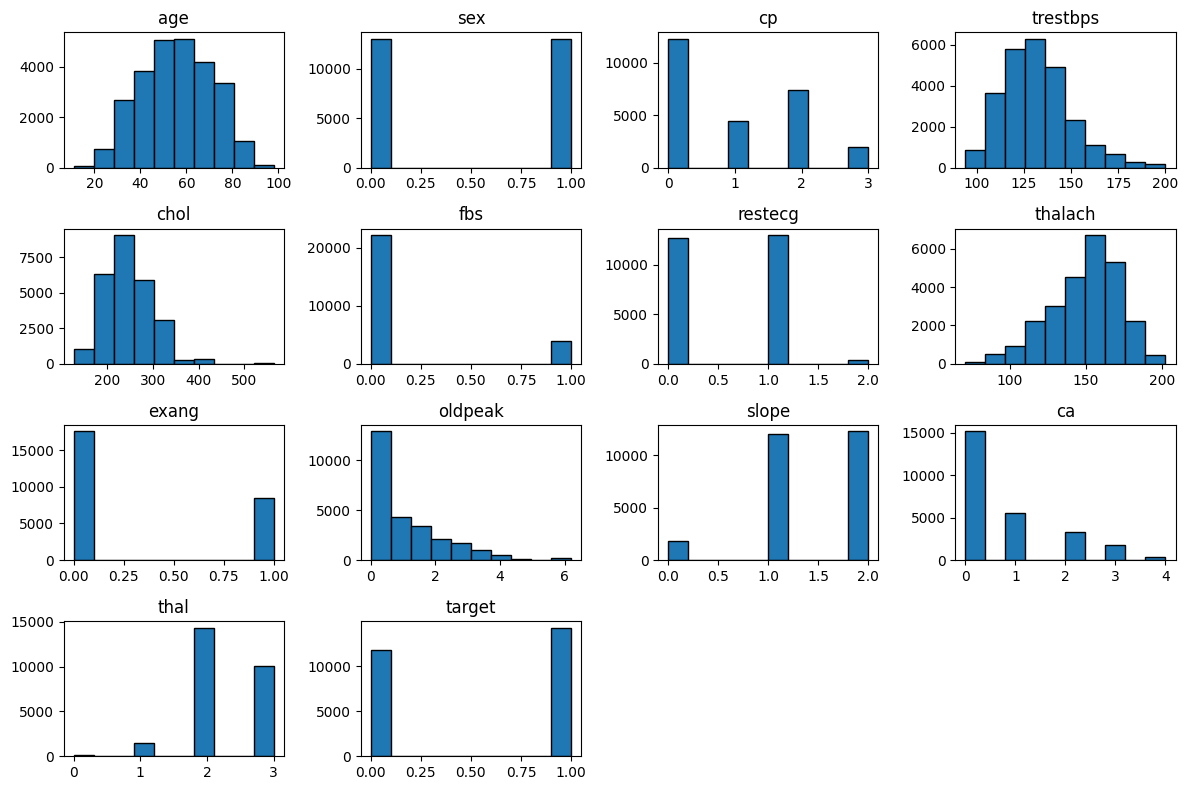

In [217]:
# Histogram distribusi setiap fitur dataframe
df.hist(figsize=(12, 8), edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

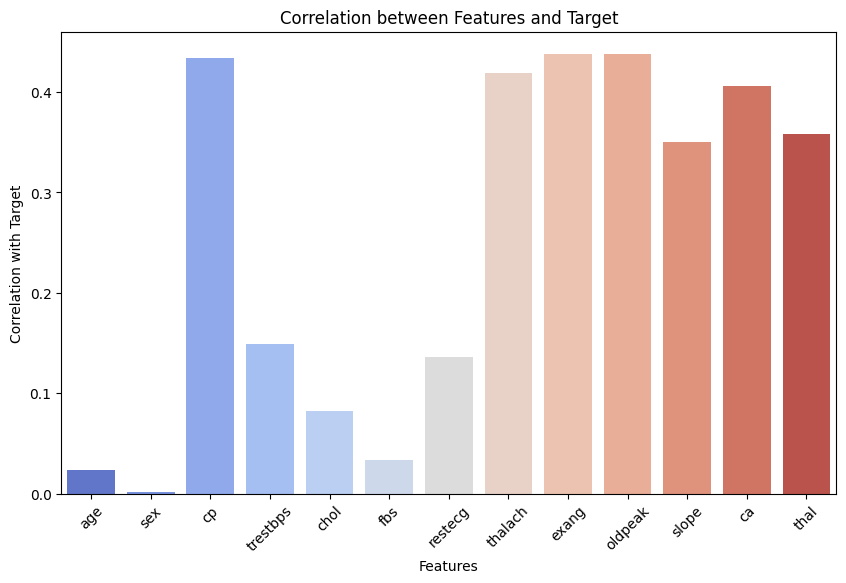

In [248]:
# Menghitung matriks korelasi antara fitur-fitur dan variabel target
correlation_matrix = df.corr().abs()

# Menghitung korelasi fitur-fitur dengan variabel target
target_correlation = correlation_matrix['target'].drop('target')  # Remove the target itself

# Membuat plot batang untuk visualisasi korelasi fitur dengan variabel target
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation between Features and Target')
plt.show()

## 2. Split data untuk training dan testing (80:20).
Index dari data training dan test harus sama ketika digunakan untuk training/testing pada semua algoritma klasifikasi.


In [219]:
print("Jumlah masing-masing kelas:\n", df['target'].value_counts())

Jumlah masing-masing kelas:
 1    14274
0    11809
Name: target, dtype: int64


In [220]:
# Splitting fitur dan class
X = df.drop(columns=['target'])
y = df['target']

# Terapkan Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Cetak jumlah kelas setelah undersampling
print("Jumlah kelas setelah undersampling:\n", y_resampled.value_counts())

Jumlah kelas setelah undersampling:
 0    11809
1    11809
Name: target, dtype: int64


In [221]:
# Bagi dataset menjadi data latih (training) dan data uji (testing) dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## 3. Metode klasifikasi:
1. Support Vector Machine
2. Gaussian Naive Bayes
3. Ridge Classifier
4. Linear Discriminant Analysis
5. Logistic Regression

### 1. Support Vector Machine

In [222]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

In [223]:
# Latih model pada data latih
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [224]:
# Lakukan prediksi pada data uji
svm_pred = svm_model.predict(X_test)

### 2. Gaussian Naive Bayes

In [225]:
# Inisialisasi model Gaussian Naive Bayes
gnb = GaussianNB()

In [226]:
# Latih model pada data latih
gnb.fit(X_train, y_train)

GaussianNB()

In [227]:
gnb_pred = gnb.predict(X_test)

### 3. Ridge Classifier

In [228]:
ridge_classifier = RidgeClassifier(alpha=1.0, solver='auto', random_state=42)

In [229]:
# Melatih model pada data pelatihan
ridge_classifier.fit(X_train, y_train)

RidgeClassifier(random_state=42)

In [230]:
# Melakukan prediksi pada data uji
rc_pred = ridge_classifier.predict(X_test)

### 4. Linear Discriminant Analysist

In [231]:
lda = LinearDiscriminantAnalysis()

In [232]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [233]:
lda_pred = lda.predict(X_test)

### 5. Logistic Regression

In [234]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [235]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [236]:
lr_pred = logistic_regression.predict(X_test)

## 4. Model evaluator:
1. Precision
2. Recall
3. F1-measure

In [237]:
# Hitung precision, recall, dan F1-score
def eval(y_test,model):
    precision = precision_score(y_test, model, average='weighted')
    recall = recall_score(y_test, model, average='weighted')
    f1 = f1_score(y_test, model, average='weighted')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    print()
    print(confusion_matrix(y_test, model))
    print(classification_report(y_test, model))
    return

### 1. Support Vector Machine

In [238]:
eval(y_test, svm_pred)

Precision: 0.844
Recall: 0.841
F1-score: 0.841

[[1870  482]
 [ 267 2105]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      2352
           1       0.81      0.89      0.85      2372

    accuracy                           0.84      4724
   macro avg       0.84      0.84      0.84      4724
weighted avg       0.84      0.84      0.84      4724



### 2. Gaussian Naive Bayes

In [239]:
eval(y_test, gnb_pred)

Precision: 0.829
Recall: 0.828
F1-score: 0.828

[[1887  465]
 [ 348 2024]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2352
           1       0.81      0.85      0.83      2372

    accuracy                           0.83      4724
   macro avg       0.83      0.83      0.83      4724
weighted avg       0.83      0.83      0.83      4724



### 3. Ridge Classifier

In [240]:
eval(y_test, rc_pred)

Precision: 0.858
Recall: 0.850
F1-score: 0.849

[[1827  525]
 [ 183 2189]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2352
           1       0.81      0.92      0.86      2372

    accuracy                           0.85      4724
   macro avg       0.86      0.85      0.85      4724
weighted avg       0.86      0.85      0.85      4724



### 4. Linear Discriminant Analysist

In [241]:
eval(y_test, lda_pred)

Precision: 0.858
Recall: 0.850
F1-score: 0.849

[[1827  525]
 [ 183 2189]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2352
           1       0.81      0.92      0.86      2372

    accuracy                           0.85      4724
   macro avg       0.86      0.85      0.85      4724
weighted avg       0.86      0.85      0.85      4724



### 5. Logistic Regression

In [242]:
eval(y_test, lr_pred)

Precision: 0.851
Recall: 0.848
F1-score: 0.847

[[1876  476]
 [ 244 2128]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2352
           1       0.82      0.90      0.86      2372

    accuracy                           0.85      4724
   macro avg       0.85      0.85      0.85      4724
weighted avg       0.85      0.85      0.85      4724

